In [38]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report, confusion_matrix
import seaborn as sns
from wordcloud import WordCloud

In [14]:
#Loading the dataset
data = pd.read_csv("dataset/data.csv")

data.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [15]:
#Checking the number of rows and colums
data.shape

(4009, 4)

In [16]:
#Chcecking for null values
data.isnull().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

In [17]:
#Removing null values from the Body column since it is the only one that has null values
data['Body'] = data['Body'].fillna('')

data.isnull().sum()

URLs        0
Headline    0
Body        0
Label       0
dtype: int64

In [18]:
#Combining the head and body column into an article column
data['Article'] = data['Headline']+data['Body']

data.head()


,URLs,Headline,Body,Label,Article
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,Four ways Bob Corker skewered Donald TrumpImag...
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,Linklater's war veteran comedy speaks to moder...
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,Trump’s Fight With Corker Jeopardizes His Legi...
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,Egypt's Cheiron wins tie-up with Pemex for Mex...
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,Jason Aldean opens 'SNL' with Vegas tributeCou...


In [19]:
#Dropping unnecessary features
features_dropped = ['URLs','Headline','Body']
data = data.drop(features_dropped, axis =1)

data.head()

,Label,Article
0,1,Four ways Bob Corker skewered Donald TrumpImag...
1,1,Linklater's war veteran comedy speaks to moder...
2,1,Trump’s Fight With Corker Jeopardizes His Legi...
3,1,Egypt's Cheiron wins tie-up with Pemex for Mex...
4,1,Jason Aldean opens 'SNL' with Vegas tributeCou...


In [ ]:
#Bar chart to show distribution of labels in the dataset
# Count the occurrences of each label
label_counts = data['label'].value_counts()

# Labels for the x-axis
label_names = ['True (1)', 'False (0)']

# Create a bar plot
plt.bar(label_names, label_counts, color=['blue', 'green'])

# Adding labels and title
plt.xlabel('Authenticity')
plt.ylabel('Count')
plt.title('Distribution of Labels in the Dataset')

# Show the plot
plt.show()

In [20]:
ps = PorterStemmer()


#Text preprocessing method
def clean(text):
    text = re.sub('[^a-zA-Z]', ' ',text)
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    return text


data['Article'] = data['Article'].apply(clean)


data.head()

,Label,Article
0,1,four way bob corker skewer donald trumpimag co...
1,1,linklat war veteran comedi speak modern americ...
2,1,trump fight corker jeopard legisl agendath feu...
3,1,egypt cheiron win tie pemex mexican onshor oil...
4,1,jason aldean open snl vega tributecountri sing...


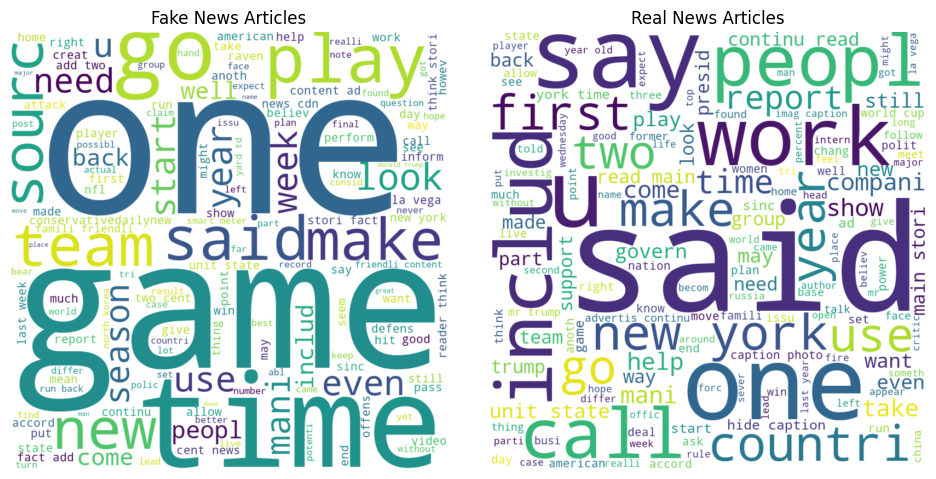

In [24]:
#Wordlcoud plotting
fake_articles = data[data['Label'] == 0]['Article']
real_articles = data[data['Label'] == 1]['Article']

# Generate word clouds
fake_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(' '.join(fake_articles))
real_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=150).generate(' '.join(real_articles))

# Plot the word clouds
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Fake News Articles')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Real News Articles')
plt.axis('off')

plt.tight_layout(pad = 3.0)
plt.show()

In [30]:
X = data['Article']
Y = data['Label']

#Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

#Vectorization
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


Logistic Regression Model Evaluation:
Accuracy: 0.9761
Precision: 0.9639
Recall: 0.9877
F1-Score: 0.9756



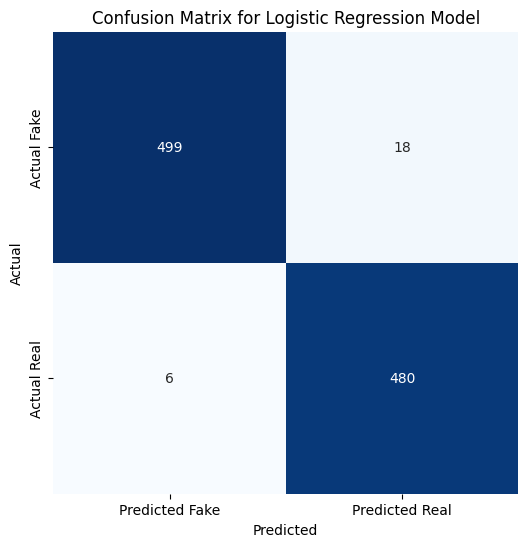

In [39]:
#Training with logistic regression model
logreg_model = LogisticRegression()

#Fitting training set to the model
logreg_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
lr_y_pred = logreg_model.predict(xv_test)

#Evaluation metrics
accuracy = accuracy_score(y_test, lr_y_pred)
precision = precision_score(y_test, lr_y_pred)
recall = recall_score(y_test, lr_y_pred)
f1 = f1_score(y_test, lr_y_pred)

print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print()

# Plot confusion matrix
cm = confusion_matrix(y_test, lr_y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Fake', 'Predicted Real'],
            yticklabels=['Actual Fake', 'Actual Real'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




SVM Model Evaluation:
Accuracy: 0.9860
Precision: 0.9797
Recall: 0.9918
F1-Score: 0.9857



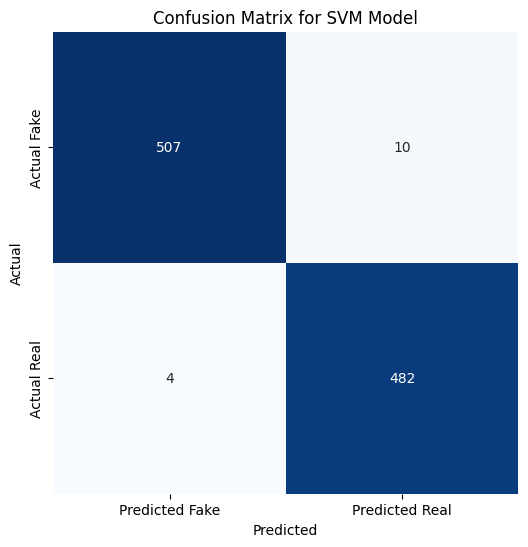

In [41]:
#Training with SVM model
svm_model = SVC(kernel='linear')

#Fitting training set to the model
svm_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
svm_y_pred = svm_model.predict(xv_test)

#Evaluation metrics
accuracy = accuracy_score(y_test, svm_y_pred)
precision = precision_score(y_test, svm_y_pred)
recall = recall_score(y_test, svm_y_pred)
f1 = f1_score(y_test, svm_y_pred)

print("SVM Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print()

# Plot confusion matrix
cm = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Fake', 'Predicted Real'],
            yticklabels=['Actual Fake', 'Actual Real'])
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Classifier Model Evaluation:
Accuracy: 0.9671
Precision: 0.9432
Recall: 0.9918
F1-Score: 0.9669



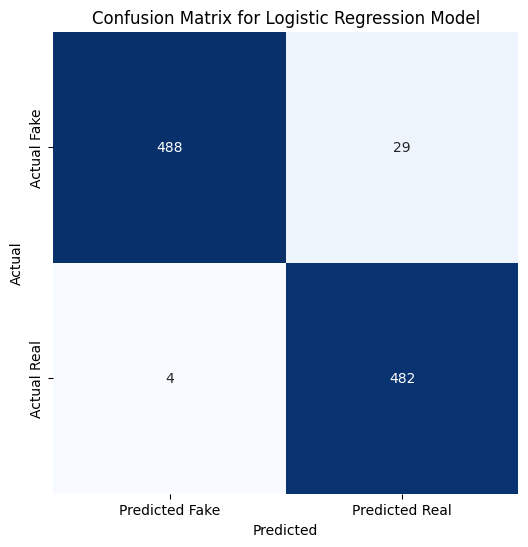

In [42]:
#Training with RandomForestClassifier
rfc_model = RandomForestClassifier(random_state=0)

#Fitting training set to the model
rfc_model.fit(xv_train, y_train)

#Predicting the test set results based on the model
rfc_y_pred = rfc_model.predict(xv_test)

#Calculate the accuracy score of this model
rfc_score = accuracy_score(y_test,rfc_y_pred)

#Evaluation metrics
accuracy = accuracy_score(y_test, rfc_y_pred)
precision = precision_score(y_test, rfc_y_pred)
recall = recall_score(y_test, rfc_y_pred)
f1 = f1_score(y_test, rfc_y_pred)

print("Random Forest Classifier Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print()

# Plot confusion matrix
cm = confusion_matrix(y_test, rfc_y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Fake', 'Predicted Real'],
            yticklabels=['Actual Fake', 'Actual Real'])
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [43]:
#Function for detection
#SVM model will be used since it had the highest accuracy
def fake_news_detector(article):
    input_data = {"text":[article]}
    new_def_test = pd.DataFrame(input_data)
    new_def_test["text"] = new_def_test["text"].apply(clean) 
    new_x_test = new_def_test["text"]
    vectorized_input_data = vectorization.transform(new_x_test)
    prediction = svm_model.predict(vectorized_input_data)
    
    if prediction == 1:
        print("Real")
    else:
        print("Fake")